Assignment 7: Direct Mail Marketing (Decision Tree)

Created by : Bhuvnesh Kumar

[Statinfer.com](https://statinfer.com/)

# Assignment Information

This assignment has been divided into 4 parts:
1. Data Importing and Exploration
2. Data Cleaning and Preparation
3. Decision Tree Model Building and Hyper Parameter Tuning
4. Solving Class Imbalance


# Dataset Information
An insurance company need to come up with a good marketing strategy. They want to run an e-mail campaign. Before sending a mail to all the available e-mail addresses, they want to first build a predictive model and identify the customers who are most likely to respond.

Analyze the historical data and build a predictive model that helps us in maximizing the response rate. Thereby the company will be able to manage their cost by sending email only to those who is most likely to respond.

The columns in the given dataset are as follows:

1. **AGE:** Age of the customer.
2. **CRED:** Credit Score of the customer
3. **MS:** marital status
4. **HEQ:** Home Equity
5. **INCOME:** Customer's income
6. **DEPC:** 
7. **MOB:** Member of the Bank
8. **MILEAGE:** Mileage
9. **RESTYPE:** Residence Type
10. **GENDER:** Gender
11. **EMP_STA:** Employment Status
12. **RES_STA:** Residnece Status
13. **DELINQ:** Number of recent deliquencies
14. **NUMTR:** 
15. **MRTGI:** Mortgate Indicator
16. **MFDU:** 

We need to classify `resp` given rest of the features.

Dataset Link: https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Direct_mail_marketing/DirectMail_clean.csv

# Part 1: Data Importing and Data Exploration

**Importing dataset**
1. Import the dataset and run basic checks commands

**Data Exploration and Visualization**
2. Univariate Analysis:
  * Check Frequency counts of Categorical Variables
  * Check Distribution of Numerical Variables (`.describe()`)
3. Perform Bi-variate Analysis with relation to the prediction column `Selling_price`:
  * Categorical columns : `sns.barplot()`
  * Numerical Columns : `sns.regplot()`



# 1) Import the data and run basic checks

In [ ]:
# Write your code here
import pandas as pd
import numpy as np

In [ ]:
email_data=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Direct_mail_marketing/DirectMail_clean.csv")
email_data.head()

,AGE,CRED,MS,HEQ,INCOME,DEPC,MOB,MILEAGE,RESTYPE,GENDER,EMP_STA,RES_STA,DELINQ,NUMTR,MRTGI,MFDU,resp
0,20,543.0,U,0.1,20,N,Y,14.418,HOME,M,"1,2","1,2",0,2,N,0,0
1,18,445.0,U,0.1,20,N,Y,0.311,HOME,M,0,"1,2",2,2,Y,0,0
2,19,423.0,U,0.1,20,N,N,17.876,HOME,M,"1,2","1,2",1,0,Y,0,0
3,18,416.0,X,0.1,20,N,Y,17.084,HOME,F,"1,2","1,2",0,0,Y,0,0
4,18,522.0,U,0.1,20,Y,Y,16.510,HOME,F,"1,2","1,2",1,0,Y,0,0


"resp" is our target variable

## Basic Exploration and DataViz

# 2) Perform UniVariate Analysis

In [ ]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29904 entries, 0 to 29903
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      29904 non-null  int64  
 1   CRED     29871 non-null  float64
 2   MS       29904 non-null  object 
 3   HEQ      29904 non-null  float64
 4   INCOME   29904 non-null  int64  
 5   DEPC     29904 non-null  object 
 6   MOB      29904 non-null  object 
 7   MILEAGE  29904 non-null  float64
 8   RESTYPE  29904 non-null  object 
 9   GENDER   29904 non-null  object 
 10  EMP_STA  29904 non-null  object 
 11  RES_STA  29904 non-null  object 
 12  DELINQ   29904 non-null  int64  
 13  NUMTR    29904 non-null  int64  
 14  MRTGI    29904 non-null  object 
 15  MFDU     29904 non-null  int64  
 16  resp     29904 non-null  int64  
dtypes: float64(3), int64(6), object(8)
memory usage: 3.9+ MB


In [ ]:
email_data.describe()

,AGE,CRED,HEQ,INCOME,MILEAGE,DELINQ,NUMTR,MFDU,resp
count,29904.000000,29871.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000
mean,49.300361,603.627364,38.328892,41.360688,11.803395,0.766152,0.763343,0.452749,0.095539
std,15.546298,98.136661,37.205701,15.441137,5.744523,1.140847,1.143284,0.497771,0.293963
min,18.000000,300.000000,0.100000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,574.000000,10.000000,30.000000,7.775750,0.000000,0.000000,0.000000,0.000000
50%,50.000000,617.000000,30.000000,40.000000,12.536500,0.000000,0.000000,0.000000,0.000000
75%,61.000000,652.000000,50.000000,50.000000,16.193250,1.000000,1.000000,1.000000,0.000000
max,90.000000,1789.000000,200.000000,110.000000,94.640000,7.000000,7.000000,1.000000,1.000000


In [ ]:
email_data.shape

(29904, 17)

In [ ]:
categorical = ['MS', 'DEPC', 'MOB', 'RESTYPE', 'GENDER', 'EMP_STA', 'RES_STA', 'DELINQ', 'MRTGI', 'MFDU']
numerical = ['AGE', 'CRED', 'HEQ', 'INCOME', 'MILEAGE', 'NUMTR']

### UniVariate Analysis:Categorical Variables

'MS', 'DEPC', 'MOB', 'RESTYPE', 'GENDER', 'EMP_STA', 'RES_STA', 'DELINQ', 'MRTGI', 'MFDU'

-are categorical variables, Let's look at their value counts.

In [ ]:
for cat in categorical:
  print("==========="+cat+"============")
  print(email_data[cat].value_counts())
  print()
  

===========MS============
M    17221
U    11721
X      962
Name: MS, dtype: int64

===========DEPC============
N    18502
Y    11402
Name: DEPC, dtype: int64

===========MOB============
Y    18564
N    11340
Name: MOB, dtype: int64

===========RESTYPE============
HOME      16365
RENTER    12088
COOP        885
CONDO       566
Name: RESTYPE, dtype: int64

===========GENDER============
M    17276
F    12628
Name: GENDER, dtype: int64

===========EMP_STA============
1,2    27146
3+      1790
0        968
Name: EMP_STA, dtype: int64

===========RES_STA============
1,2    28109
3+      1795
Name: RES_STA, dtype: int64

===========DELINQ============
0    17688
1     5991
2     3084
3     1984
4     1071
7       29
5       29
6       28
Name: DELINQ, dtype: int64

===========MRTGI============
N    17484
Y    10657
U     1763
Name: MRTGI, dtype: int64

===========MFDU============
0    16365
1    13539
Name: MFDU, dtype: int64



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

===========MS============


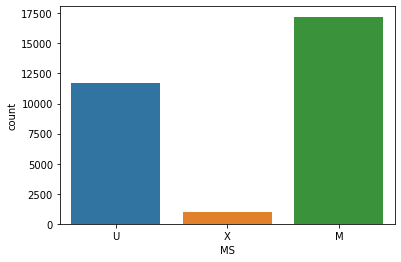


===========DEPC============


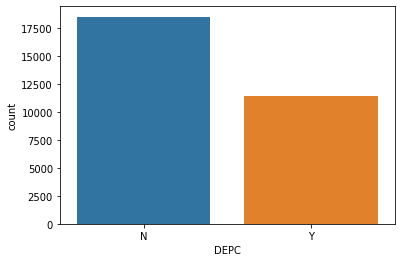


===========MOB============


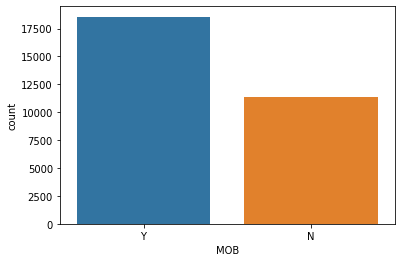


===========RESTYPE============


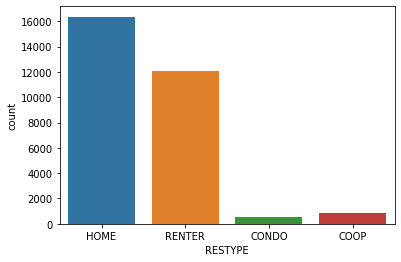


===========GENDER============


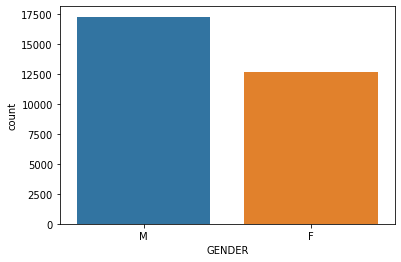


===========EMP_STA============


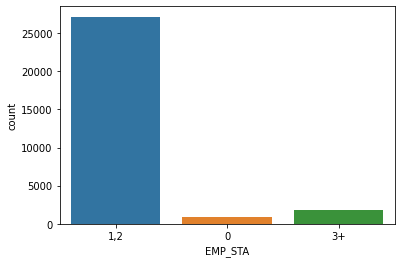


===========RES_STA============


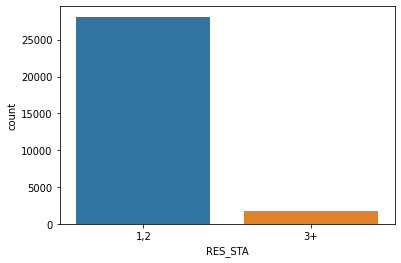


===========DELINQ============


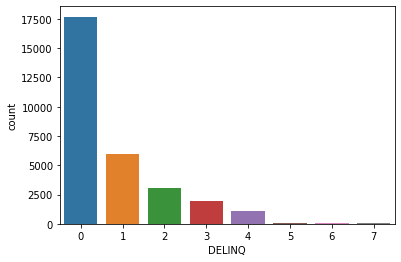


===========MRTGI============


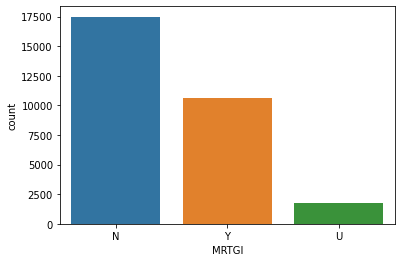


===========MFDU============


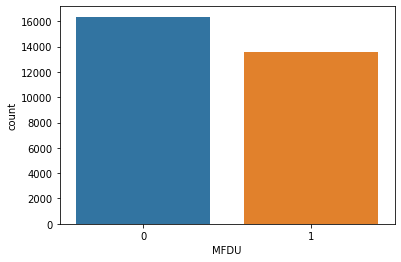

In [ ]:
for cat in categorical:
  print("==========="+cat+"============")
  sns.countplot(data=email_data, x=cat)
  plt.show()
  print()

### UniVariate Analysis:Numerical Variables

In [ ]:
for num in numerical:
  print("==========="+num+"============")
  print(email_data[num].describe())
  print()

===========AGE============
count    29904.000000
mean        49.300361
std         15.546298
min         18.000000
25%         36.000000
50%         50.000000
75%         61.000000
max         90.000000
Name: AGE, dtype: float64

===========CRED============
count    29871.000000
mean       603.627364
std         98.136661
min        300.000000
25%        574.000000
50%        617.000000
75%        652.000000
max       1789.000000
Name: CRED, dtype: float64

===========HEQ============
count    29904.000000
mean        38.328892
std         37.205701
min          0.100000
25%         10.000000
50%         30.000000
75%         50.000000
max        200.000000
Name: HEQ, dtype: float64

===========INCOME============
count    29904.000000
mean        41.360688
std         15.441137
min         20.000000
25%         30.000000
50%         40.000000
75%         50.000000
max        110.000000
Name: INCOME, dtype: float64

===========MILEAGE============
count    29904.000000
mean        11.8033

===========AGE============


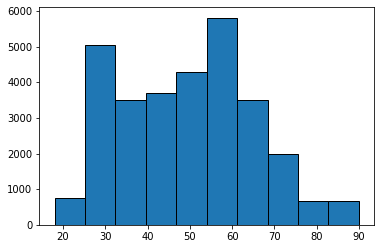


===========CRED============


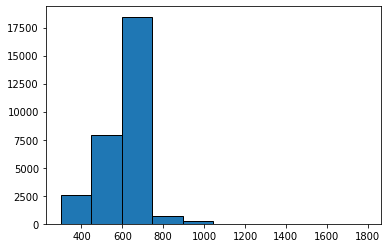


===========HEQ============


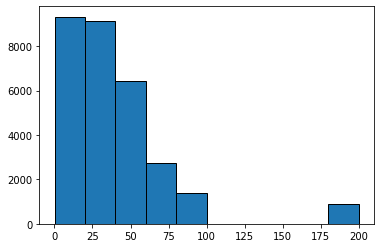


===========INCOME============


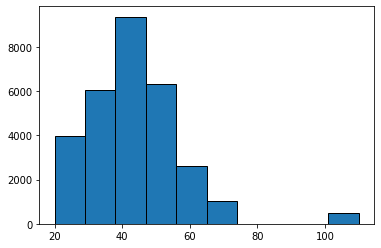


===========MILEAGE============


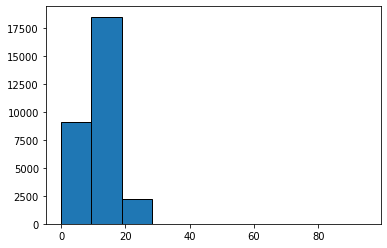


===========NUMTR============


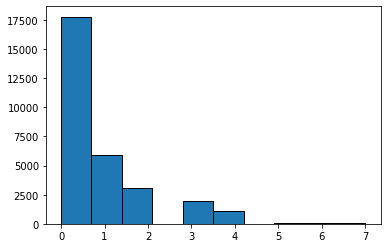

In [ ]:
for num in numerical:
  print("==========="+num+"============")
  plt.hist(email_data[num],edgecolor='black')
  plt.show()
  print()

# 3) Perform Bi-variate Analysis with relation to the prediction column: `resp`

### Bi-variate Visualization of Categorical variables:

**HINT:** `sns.catplot()`


===========MS============


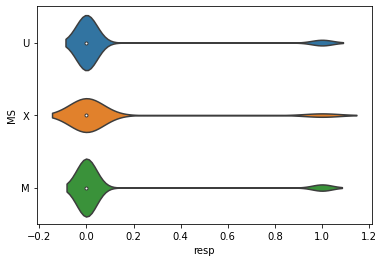


===========DEPC============


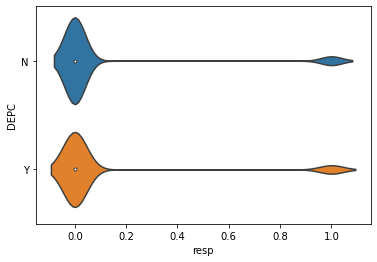


===========MOB============


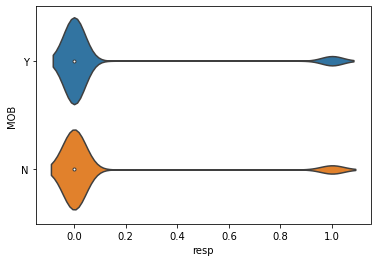


===========RESTYPE============


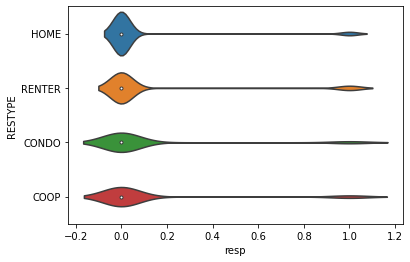


===========GENDER============


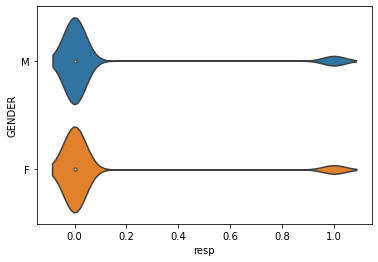


===========EMP_STA============


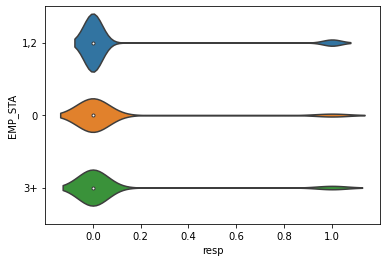


===========RES_STA============


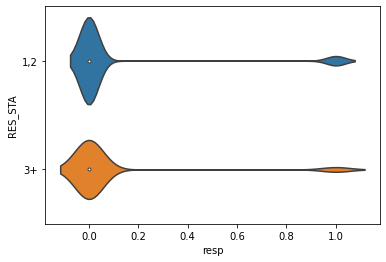


===========DELINQ============


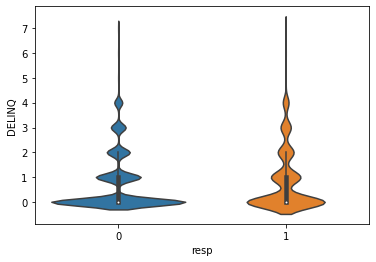


===========MRTGI============


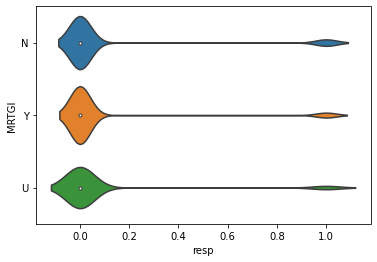


===========MFDU============


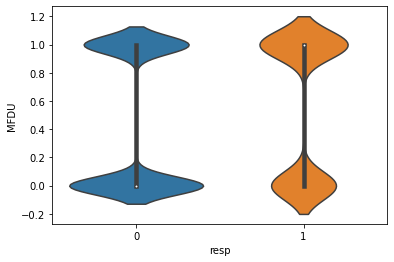

In [ ]:
# Write your code here
for cat in categorical:
  print("==========="+cat+"============")
  sns.violinplot(data=email_data,x='resp',y=cat)
  plt.show()
  print()

### Bi-variate Visualization of Numerical variables:

**HINT:** You may want to use `sns.boxplot()`


===========AGE============


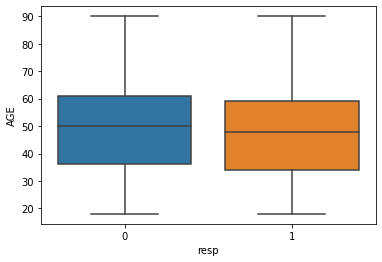


===========CRED============


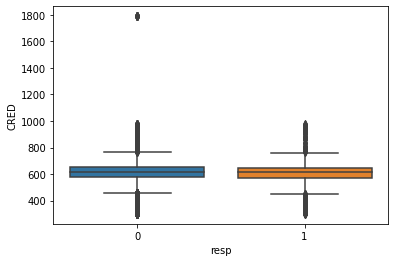


===========HEQ============


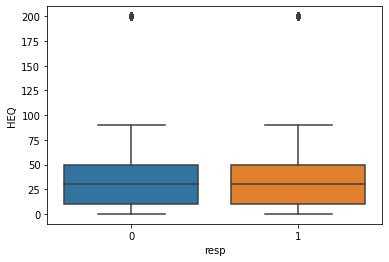


===========INCOME============


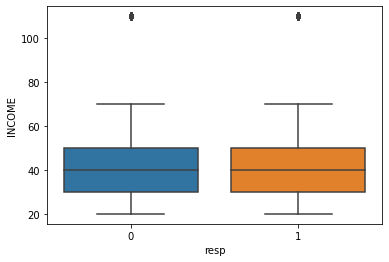


===========MILEAGE============


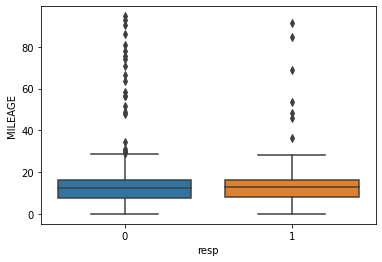


===========NUMTR============


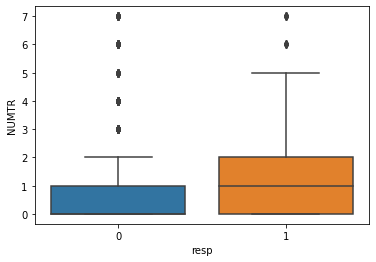

In [ ]:
# Write your code here
for num in numerical:
  print("==========="+num+"============")
  sns.boxplot(x='resp', y=num, data=email_data)
  plt.show()
  print()


# Part2: Data Cleaning and Preparation:

Check the categorical variables, we need to convert them into numerical columns.

4. Find a variable with missing value/Outliers and treat accordingly

5. Convert categorical columns into numerical using binary mapping or using dummy columns, as required:
  * Use `pd.get_dummies()` to create dummy columns for: `Fuel_Type`
  * **Map** `Transmission` and `Seller_Type`'s categories to `0` and `1`

6. Concatenate the dummy columns with the main data and clean it
  * Drop the **Parent columns of dummy columns** from dataframe

# 4) Handle Missing Values and Outliers

**HINT:** there is only one column with missing values

In [ ]:
# Write your code here
email_data.isnull().sum()

AGE         0
CRED       33
MS          0
HEQ         0
INCOME      0
DEPC        0
MOB         0
MILEAGE     0
RESTYPE     0
GENDER      0
EMP_STA     0
RES_STA     0
DELINQ      0
NUMTR       0
MRTGI       0
MFDU        0
resp        0
dtype: int64

In [ ]:
email_data.CRED.isnull().sum()*100/email_data.shape[0]

0.11035313001605136

In [ ]:
email_CRED_median=email_data.CRED.median()

In [ ]:
email_data['CRED_TEMP']=email_data['CRED']

In [ ]:
email_data['CRED_TEMP'].fillna(email_CRED_median, inplace=True)

In [ ]:
email_data['CRED_TEMP'].isnull().sum()

0

Finding outliers

===========AGE============


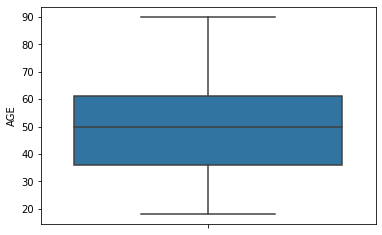


===========CRED============


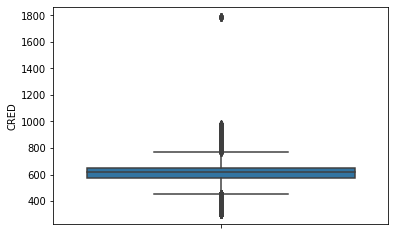


===========HEQ============


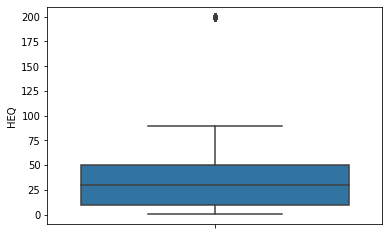


===========INCOME============


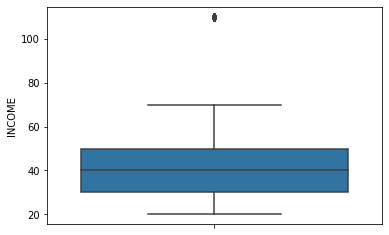


===========MILEAGE============


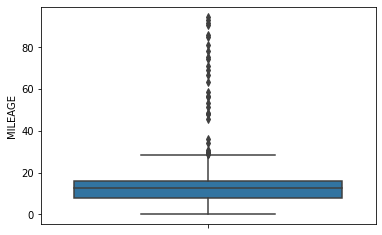


===========NUMTR============


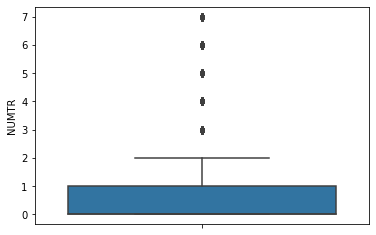

In [ ]:
for num in numerical:
  print("==========="+num+"============")
  sns.boxplot(y=num, data=email_data)
  plt.show()
  print()

Treating outliers

In [ ]:
email_data['AGE_TEMP']=email_data['AGE']

In [ ]:
len(email_data.AGE[email_data.AGE>65])*100/len(email_data)

14.15864098448368

In [ ]:
email_data['AGE_TEMP'][email_data['AGE_TEMP']>65]=email_data['AGE'].median()
email_data['AGE_TEMP'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    29904.000000
mean        45.876438
std         11.671206
min         18.000000
25%         36.000000
50%         50.000000
75%         55.000000
max         65.000000
Name: AGE_TEMP, dtype: float64

Outlier for CRED

In [ ]:
len(email_data[email_data['CRED']<450])*100/len(email_data)

8.617576243980738

In [ ]:
email_data['CRED'].isnull().sum()

33

In [ ]:
email_data['CRED'].fillna(email_data['CRED'].median(), inplace=True)

In [ ]:
email_data['CRED'].isnull().sum()

0

In [ ]:
email_data['CRED'] = np.where(email_data['CRED'] < 450, email_data['CRED'].median(), email_data['CRED'])

In [ ]:
email_data['CRED'].describe()

count    29904.000000
mean       624.508661
std         67.313116
min        450.000000
25%        594.000000
50%        617.000000
75%        652.000000
max       1789.000000
Name: CRED, dtype: float64

Outlier treatment for HEQ

In [ ]:
(email_data['HEQ']>100).sum()*100/len(email_data)

3.006286784376672

In [ ]:
email_data['HEQ_TEMP']=email_data['HEQ']

In [ ]:
email_data[email_data['HEQ_TEMP']>100]['HEQ_TEMP']=email_data['HEQ'].median()
email_data['HEQ_TEMP'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    29904.000000
mean        38.328892
std         37.205701
min          0.100000
25%         10.000000
50%         30.000000
75%         50.000000
max        200.000000
Name: HEQ_TEMP, dtype: float64

Outlier treatment for Income

In [ ]:
(email_data['INCOME']>80).sum()*100/len(email_data)

1.621856607811664

In [ ]:
email_data['INCOME'] = np.where(email_data['INCOME'] > 100, email_data['INCOME'].median(), email_data['INCOME'])
email_data['INCOME'].describe()

count    29904.000000
mean        40.225388
std         12.678951
min         20.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         70.000000
Name: INCOME, dtype: float64

Outlier treatment for Mileage

In [ ]:
(email_data['MILEAGE']>30).sum()*100/len(email_data)

0.08694489031567683

In [ ]:
email_data['MILEAGE'] = np.where(email_data['MILEAGE'] > 30, email_data['MILEAGE'].median(), email_data['MILEAGE'])
email_data['MILEAGE'].describe()

count    29904.000000
mean        11.757857
std          5.498993
min          0.000000
25%          7.775750
50%         12.536250
75%         16.182000
max         29.993000
Name: MILEAGE, dtype: float64

Outlier treatment for NUMTR

In [ ]:
(email_data['NUMTR']>2).sum()*100/len(email_data)

10.557116104868914

In [ ]:
email_data['NUMTR'] = np.where(email_data['NUMTR'] > 2, email_data['NUMTR'].median(), email_data['NUMTR'])
email_data['NUMTR'].describe()

count    29904.000000
mean         0.401786
std          0.666399
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: NUMTR, dtype: float64

In [ ]:
cross_delinq=pd.crosstab(email_data['DELINQ'],email_data['resp'])
cross_delinq

resp,0,1
DELINQ,,
0,16093,1595
1,5387,604
2,2760,324
3,1775,209
4,954,117
5,26,3
6,24,4
7,28,1


In [ ]:
#Cross tab row Percentages
cross_delinq=cross_delinq.astype(float).div(cross_delinq.sum(axis=1), axis=0)
round(cross_delinq,2)

resp,0,1
DELINQ,,
0,0.91,0.09
1,0.90,0.10
2,0.89,0.11
3,0.89,0.11
4,0.89,0.11
5,0.90,0.10
6,0.86,0.14
7,0.97,0.03


In [ ]:
i=[5.0,6.0,7.0]
j=[1.0,2.0,0.0]
email_data['DELINQ'].replace(i,j, inplace=True)
email_data['DELINQ'].value_counts()

0.0    17717
1.0     6020
2.0     3112
3.0     1984
4.0     1071
Name: DELINQ, dtype: int64

In [ ]:
print(email_data['DELINQ'].value_counts())


0.0    17717
1.0     6020
2.0     3112
3.0     1984
4.0     1071
Name: DELINQ, dtype: int64
























# 5) Convert categorical columns into numerical, use dummy variables or mapping accordingly:
* **Dummy Variables:**  pd.get_dummies() to create dummy columns for: `DEPC`, `GENDER`, `RES_STA`
* **Mapping:**  Transmission and Seller_Type's categories to 0 and 1

In [ ]:
## Map binary variables herer
email_data['MOB'].value_counts()

Y    18564
N    11340
Name: MOB, dtype: int64

In [ ]:
email_data['MOB']=email_data['MOB'].map({'Y':1,'N':0}).astype(int)

In [ ]:
email_data['MOB'].value_counts()

1    18564
0    11340
Name: MOB, dtype: int64

In [ ]:
# get dummy variables
categories=list(email_data.select_dtypes(exclude=['int64','float']))
categories

['MS', 'DEPC', 'RESTYPE', 'GENDER', 'EMP_STA', 'RES_STA', 'MRTGI']

In [ ]:
categories = np.setdiff1d(categories, ['MOB','DEPC']).tolist()
categories

['EMP_STA', 'GENDER', 'MRTGI', 'MS', 'RESTYPE', 'RES_STA']

In [ ]:
email_data=pd.get_dummies(email_data, columns=categories, drop_first=True)
email_data

,AGE,CRED,HEQ,INCOME,DEPC,MOB,MILEAGE,DELINQ,NUMTR,MFDU,resp,CRED_TEMP,AGE_TEMP,HEQ_TEMP,"EMP_STA_1,2",EMP_STA_3+,GENDER_M,MRTGI_U,MRTGI_Y,MS_U,MS_X,RESTYPE_COOP,RESTYPE_HOME,RESTYPE_RENTER,RES_STA_3+
0,20,543.0,0.1,20.0,N,1,14.418,0.0,2.0,0,0,543.0,20,0.1,1,0,1,0,0,1,0,0,1,0,0
1,18,617.0,0.1,20.0,N,1,0.311,2.0,2.0,0,0,445.0,18,0.1,0,0,1,0,1,1,0,0,1,0,0
2,19,617.0,0.1,20.0,N,0,17.876,1.0,0.0,0,0,423.0,19,0.1,1,0,1,0,1,1,0,0,1,0,0
3,18,617.0,0.1,20.0,N,1,17.084,0.0,0.0,0,0,416.0,18,0.1,1,0,0,0,1,0,1,0,1,0,0
4,18,522.0,0.1,20.0,Y,1,16.510,1.0,0.0,0,0,522.0,18,0.1,1,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,56,1789.0,30.0,30.0,Y,1,17.302,1.0,0.0,1,0,1789.0,56,30.0,1,0,0,0,1,0,0,1,0,0,1
29900,58,1789.0,30.0,40.0,Y,0,10.509,0.0,0.0,0,0,1789.0,58,30.0,1,0,1,0,1,1,0,0,1,0,1
29901,64,1789.0,30.0,40.0,Y,0,4.749,0.0,0.0,1,0,1789.0,64,30.0,1,0,0,0,0,0,0,0,0,1,0
29902,64,1789.0,30.0,40.0,Y,1,11.110,0.0,0.0,0,0,1789.0,64,30.0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
# Renaming the columns 
email_data.rename(columns={'EMP_STA_1,2':'EMP_STA_1_2','EMP_STA_3+':'EMP_STA_3_plus','RES_STA_3+':'RES_STA_3_plus'}, inplace=True)
email_data

,AGE,CRED,HEQ,INCOME,DEPC,MOB,MILEAGE,DELINQ,NUMTR,MFDU,resp,CRED_TEMP,AGE_TEMP,HEQ_TEMP,EMP_STA_1_2,EMP_STA_3_plus,GENDER_M,MRTGI_U,MRTGI_Y,MS_U,MS_X,RESTYPE_COOP,RESTYPE_HOME,RESTYPE_RENTER,RES_STA_3_plus
0,20,543.0,0.1,20.0,N,1,14.418,0.0,2.0,0,0,543.0,20,0.1,1,0,1,0,0,1,0,0,1,0,0
1,18,617.0,0.1,20.0,N,1,0.311,2.0,2.0,0,0,445.0,18,0.1,0,0,1,0,1,1,0,0,1,0,0
2,19,617.0,0.1,20.0,N,0,17.876,1.0,0.0,0,0,423.0,19,0.1,1,0,1,0,1,1,0,0,1,0,0
3,18,617.0,0.1,20.0,N,1,17.084,0.0,0.0,0,0,416.0,18,0.1,1,0,0,0,1,0,1,0,1,0,0
4,18,522.0,0.1,20.0,Y,1,16.510,1.0,0.0,0,0,522.0,18,0.1,1,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,56,1789.0,30.0,30.0,Y,1,17.302,1.0,0.0,1,0,1789.0,56,30.0,1,0,0,0,1,0,0,1,0,0,1
29900,58,1789.0,30.0,40.0,Y,0,10.509,0.0,0.0,0,0,1789.0,58,30.0,1,0,1,0,1,1,0,0,1,0,1
29901,64,1789.0,30.0,40.0,Y,0,4.749,0.0,0.0,1,0,1789.0,64,30.0,1,0,0,0,0,0,0,0,0,1,0
29902,64,1789.0,30.0,40.0,Y,1,11.110,0.0,0.0,0,0,1789.0,64,30.0,1,0,0,0,1,0,0,0,1,0,0


# 6) Finally Clean-up the dataframe for modeling by removing unnecessary columns.(parent columns of the dummy columns)

In [ ]:
## Merge Dummy columns to dataframe:
# Concatenate dummy columns with main dataframe

In [ ]:
## Drop parent columns
cat_list=['DEPC','CRED','AGE','HEQ']
email_data.drop(cat_list, axis=1, inplace=True)
email_data.columns

Index(['INCOME', 'MOB', 'MILEAGE', 'DELINQ', 'NUMTR', 'MFDU', 'resp',
       'CRED_TEMP', 'AGE_TEMP', 'HEQ_TEMP', 'EMP_STA_1_2', 'EMP_STA_3_plus',
       'GENDER_M', 'MRTGI_U', 'MRTGI_Y', 'MS_U', 'MS_X', 'RESTYPE_COOP',
       'RESTYPE_HOME', 'RESTYPE_RENTER', 'RES_STA_3_plus'],
      dtype='object')

# Part3: Decision Tree Modeling

7. Do a Train-Test Split 20%; and `random_state = 42`.
8. Build a Decision Tree model
  * predict labels on train and test data
  * Create confusion matrices
  * Calculate Accuracies
  * Calculate Sensitivity and Specificity( recall for class1 and class0)
9. Perform Hyper Parameter search to solve overfitting:
  * `max_depth` and `max_leaf_nodes`
10. Perform Hyper Parameter search for higher Sensitivity or Specificity(whichever is required for this problem).


# 7) Do a Train-Test Split 20%; keep `random_state = 42`.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Write your code here
x=email_data.loc[:,email_data.drop('resp',axis=1).columns.tolist()]
y=email_data['resp']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=42)

# 8) Build First Decision Tree Model
  * predict labels on train and test data
  * Create confusion matrices
  * Calculate Accuracies
  * Calculate Sensitivity and Specificity
**HINT:** you may want to utilize `classifcation_report` from `sklearn.matrices`

In [ ]:
from sklearn import tree

In [ ]:
# Write your code here
#Building Tree Model\
DTree = tree.DecisionTreeClassifier(max_depth=5)
DTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(694.2099056603773, 498.3, 'MFDU <= 0.5\nsamples = 23923\nvalue = [21656, 2267]'),
 Text(348.75, 407.70000000000005, 'INCOME <= 25.0\nsamples = 13060\nvalue = [12114, 946]'),
 Text(144.76415094339623, 317.1, 'AGE_TEMP <= 29.5\nsamples = 1754\nvalue = [1524, 230]'),
 Text(52.64150943396226, 226.5, 'MILEAGE <= 0.104\nsamples = 432\nvalue = [359, 73]'),
 Text(26.32075471698113, 135.89999999999998, 'samples = 1\nvalue = [0, 1]'),
 Text(78.9622641509434, 135.89999999999998, 'DELINQ <= 1.5\nsamples = 431\nvalue = [359, 72]'),
 Text(52.64150943396226, 45.299999999999955, 'samples = 341\nvalue = [291, 50]'),
 Text(105.28301886792453, 45.299999999999955, 'samples = 90\nvalue = [68, 22]'),
 Text(236.88679245283018, 226.5, 'CRED_TEMP <= 722.5\nsamples = 1322\nvalue = [1165, 157]'),
 Text(184.24528301886792, 135.89999999999998, 'CRED_TEMP <= 720.5\nsamples = 1246\nvalue = [1091, 155]'),
 Text(157.9245283018868, 45.299999999999955, 'samples = 1244\nvalue = [1091, 153]'),
 Text(210.566037735849

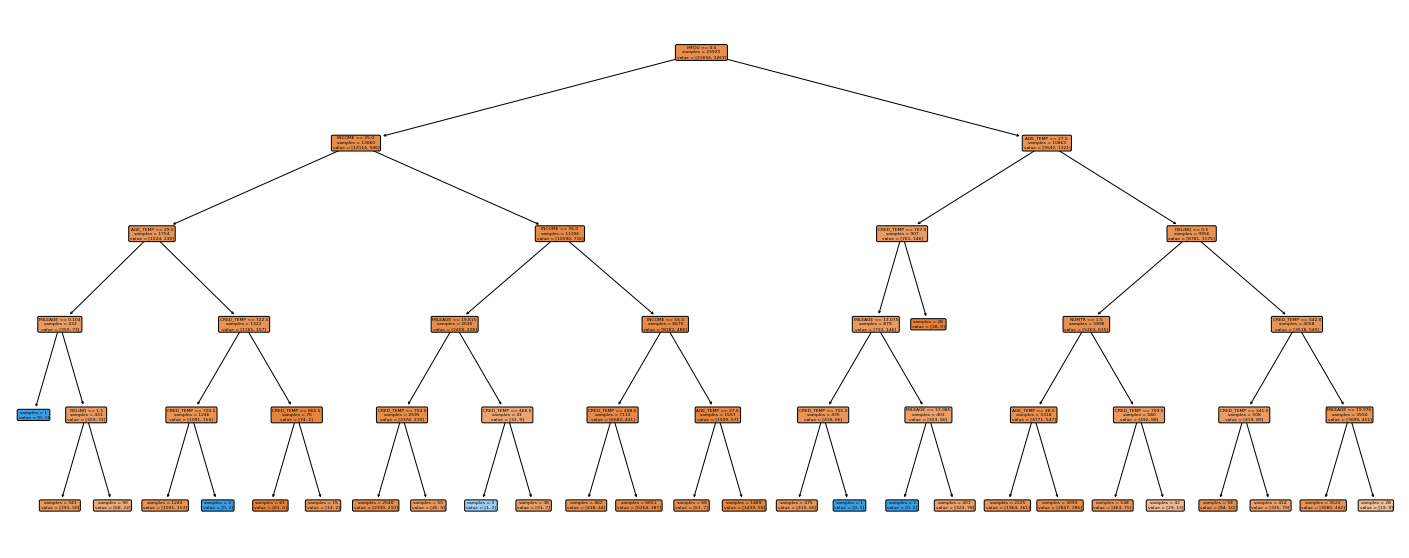

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree, export_text
# plt.figure()
# plot_tree(clf1, feature_names = list(X_train.columns.values), filled=True)
# plt.show()
##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(25,10))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = list(X_train.columns))


In [ ]:
#Tree Rules
# print(export_text(clf1, feature_names = list(X_train.columns.values)))
print( export_text(DTree, feature_names = list(X_train.columns)))

|--- MFDU <= 0.50
|   |--- INCOME <= 25.00
|   |   |--- AGE_TEMP <= 29.50
|   |   |   |--- MILEAGE <= 0.10
|   |   |   |   |--- class: 1
|   |   |   |--- MILEAGE >  0.10
|   |   |   |   |--- DELINQ <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DELINQ >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- AGE_TEMP >  29.50
|   |   |   |--- CRED_TEMP <= 722.50
|   |   |   |   |--- CRED_TEMP <= 720.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- CRED_TEMP >  720.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- CRED_TEMP >  722.50
|   |   |   |   |--- CRED_TEMP <= 865.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- CRED_TEMP >  865.50
|   |   |   |   |   |--- class: 0
|   |--- INCOME >  25.00
|   |   |--- INCOME <= 35.00
|   |   |   |--- MILEAGE <= 19.82
|   |   |   |   |--- CRED_TEMP <= 754.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- CRED_TEMP >  754.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- MILEAGE >  19.82
|   |   |   |

### Train-Test; Accuracy and Confusion Matrix

In [ ]:
## Make predictions

In [ ]:
# Write your code here
#Train accuracy
predict1 = DTree.predict(X_train)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y_train, predict1)
print (cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[21655     1]
 [ 2259     8]]
0.9055302428625173


In [ ]:
# Test accuracy
predict1 = DTree.predict(X_test)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y_test, predict1)
print (cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[5390    1]
 [ 590    0]]
0.9011870924594549


Check Confusion matrices for both train and test predictions again and see if your model overfitting?

`Write your observation in plain english here`

Here the accuracy is high but (1,1) value is far less which makes our model not suitable to predict correctly, so we have to tune the model

# 9) Perform Hyper Parameter search to solve overfitting: Grid Search
   `max_depth` and `max_leaf_nodes`

  **HINTs:**
  1. `from sklearn.model_selection import GridSearchCV`
  2. you may need to create a dictionary of parameter_grid, with parameter names as keys.

Look at the Classification Matrix, calculate the sensitivity and specificity of the model on both train and test data. And observe carefully.

In [ ]:
# Write your code here
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
              'max_features': ['auto'], 
              'criterion': ['entropy'],
              'max_depth':[5],
              'max_leaf_nodes':[40],
             }

In [ ]:
acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(DTree, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=40)

[Text(694.2099056603773, 498.3, 'MFDU <= 0.5\nsamples = 23923\nvalue = [21656, 2267]'),
 Text(348.75, 407.70000000000005, 'INCOME <= 25.0\nsamples = 13060\nvalue = [12114, 946]'),
 Text(144.76415094339623, 317.1, 'AGE_TEMP <= 29.5\nsamples = 1754\nvalue = [1524, 230]'),
 Text(52.64150943396226, 226.5, 'MILEAGE <= 0.104\nsamples = 432\nvalue = [359, 73]'),
 Text(26.32075471698113, 135.89999999999998, 'samples = 1\nvalue = [0, 1]'),
 Text(78.9622641509434, 135.89999999999998, 'DELINQ <= 1.5\nsamples = 431\nvalue = [359, 72]'),
 Text(52.64150943396226, 45.299999999999955, 'samples = 341\nvalue = [291, 50]'),
 Text(105.28301886792453, 45.299999999999955, 'samples = 90\nvalue = [68, 22]'),
 Text(236.88679245283018, 226.5, 'CRED_TEMP <= 722.5\nsamples = 1322\nvalue = [1165, 157]'),
 Text(184.24528301886792, 135.89999999999998, 'CRED_TEMP <= 720.5\nsamples = 1246\nvalue = [1091, 155]'),
 Text(157.9245283018868, 45.299999999999955, 'samples = 1244\nvalue = [1091, 153]'),
 Text(210.566037735849

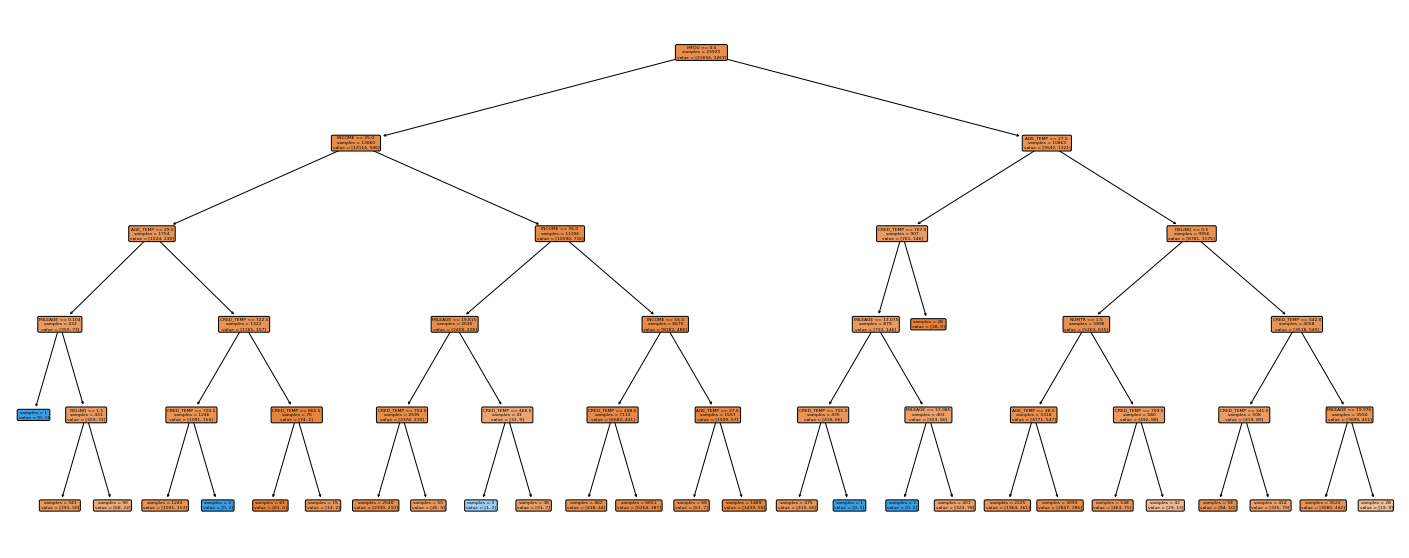

In [ ]:
# plot the tree here
plt.figure(figsize=(25,10))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = list(X_train.columns))

In [ ]:
## Make predictions
# fOR train data
predictions = clf.predict(X_train)
print("Train predictions-",accuracy_score(y_train, predictions))
# for test data
predictions = clf.predict(X_test)
print("Test predictions-",accuracy_score(y_test, predictions))

Train predictions- 0.905237637420056
Test predictions- 0.9013542885805049


In [ ]:
#Train accuracy
predict1 = DTree.predict(X_train)

#from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y_train, predict1)
print (cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[21655     1]
 [ 2259     8]]
0.9055302428625173


In [ ]:
## Classification report on training data
precision_0=cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision of zero ',precision_0 )
precision_1=cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision of one ', precision_1)
recall_0= cm[0,0]/(cm[0,0]+cm[0,1])
print('Recall of zero ', recall_0)
recall_1= cm[1,1]/(cm[1,0]+cm[1,1])
print('Recall of one ', recall_1)
f0=2/((1/recall_0)+(1/precision_0))
print('f0 score ', f0)
f1=2/((1/recall_1)+(1/precision_1))
print('f1 score ',f1 )

Precision of zero  0.9055365058124948
Precision of one  0.8888888888888888
Recall of zero  0.999953823420761
Recall of one  0.0035288928098809
f0 score  0.9504059688391485
f1 score  0.007029876977152899


In [ ]:
# Test accuracy
predict1 = DTree.predict(X_test)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y_test, predict1)
print (cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[5390    1]
 [ 590    0]]
0.9011870924594549


In [ ]:
X_train_cat=" + ".join(X_train.columns)
X_train_cat

'INCOME + MOB + MILEAGE + DELINQ + NUMTR + MFDU + CRED_TEMP + AGE_TEMP + HEQ_TEMP + EMP_STA_1_2 + EMP_STA_3_plus + GENDER_M + MRTGI_U + MRTGI_Y + MS_U + MS_X + RESTYPE_COOP + RESTYPE_HOME + RESTYPE_RENTER + RES_STA_3_plus'

In [ ]:

model_formula="resp ~ " + X_train_cat

In [ ]:
import statsmodels.formula.api as sm
risk_model=sm.logit(model_formula, data=email_data)
results=risk_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.309325
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   resp   No. Observations:                29904
Model:                          Logit   Df Residuals:                    29884
Method:                           MLE   Df Model:                           19
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                 0.01854
Time:                        04:05:50   Log-Likelihood:                -9250.1
converged:                       True   LL-Null:                       -9424.8
Covariance Type:            nonrobust   LLR p-value:                 1.279e-62
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1574        nan        nan        nan         nan         nan
INCOME           

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [ ]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
predictions = results.predict()
print(predictions[0:10])
len(predictions)

[0.12751378 0.11732396 0.12128988 0.11108973 0.10671985 0.10002386
 0.21120691 0.12938723 0.23253362 0.12972516]


29904

In [ ]:
threshold=0.5
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]
print(predicted_class1[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
## Test Classification Report
from sklearn.metrics import classification_report
print(classification_report(email_data["resp"],predicted_class1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     27047
           1       0.00      0.00      0.00      2857

    accuracy                           0.90     29904
   macro avg       0.45      0.50      0.47     29904
weighted avg       0.82      0.90      0.86     29904



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Have a look at the accuracy of the class 1(AKA Recall for class1). Write your observations:

Here the class 1 accuracy is 0 

`Write your observation in plain english here`

# 10) Run a Grid Search to improve Accuracy of class 1 AKA `Recall for class 1`.

**Hint** : In grid serach try `scoring = 'recall'` or `f1`

In [ ]:
# Write your code here
grid_obj = GridSearchCV(DTree, parameters, scoring= 'recall')
grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=40)

In [ ]:
## Make predictions
# fOR train data
predictions = clf.predict(X_train)
print("Train predictions-",accuracy_score(y_train, predictions))
# for test data
predictions = clf.predict(X_test)
print("Test predictions-",accuracy_score(y_test, predictions))

Train predictions- 0.9053630397525394
Test predictions- 0.9013542885805049


In [ ]:
#Train accuracy
predict1 = DTree.predict(X_train)

#from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y_train, predict1)
print (cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[21655     1]
 [ 2259     8]]
0.9055302428625173


In [ ]:
## Classification report on training data
precision_0=cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision of zero ',precision_0 )
precision_1=cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision of one ', precision_1)
recall_0= cm[0,0]/(cm[0,0]+cm[0,1])
print('Recall of zero ', recall_0)
recall_1= cm[1,1]/(cm[1,0]+cm[1,1])
print('Recall of one ', recall_1)
f0=2/((1/recall_0)+(1/precision_0))
print('f0 score ', f0)
f1=2/((1/recall_1)+(1/precision_1))
print('f1 score ',f1 )

Precision of zero  0.9055365058124948
Precision of one  0.8888888888888888
Recall of zero  0.999953823420761
Recall of one  0.0035288928098809
f0 score  0.9504059688391485
f1 score  0.007029876977152899


# Part 4: Solve Class Imbalance and Finalize best model

In the dataset classes are imbalanced that is causing the lower Specificity. We need to increase our Specificity(AKA `recall for class: 1`) for the model by balancing the dataset.

Solve Class Imbalance with these methods:
11. Build tree with : `class_weight="balanced"`
12. Balanced sampling.


# 11) Solve Class Imbalance with `DecisionTreeClassifier` parameter: `class_weight = balanced`
Train a tree model till the Accuracy for class 1 (AKA recall for class 1) is above 50%

### Tree with balanced class weights

In [ ]:
# Write your code here
from imblearn.over_sampling import SMOTE
counter= (y_train).shape[0]
print('Before', counter)

smt=SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter= y_train_sm.shape[0]
print('After', counter)

Before 23923
After 43312


In [ ]:
# Write your code here
DTree = tree.DecisionTreeClassifier(max_depth=5)
DTree.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=5)

[Text(434.0, 498.3, 'RESTYPE_HOME <= 0.5\nsamples = 43312\nvalue = [21656, 21656]'),
 Text(170.5, 407.70000000000005, 'MFDU <= 0.5\nsamples = 26648\nvalue = [9542, 17106]'),
 Text(139.5, 317.1, 'samples = 9160\nvalue = [0, 9160]'),
 Text(201.5, 317.1, 'DELINQ <= 0.0\nsamples = 17488\nvalue = [9542, 7946]'),
 Text(124.0, 226.5, 'NUMTR <= 0.0\nsamples = 8430\nvalue = [5723, 2707]'),
 Text(62.0, 135.89999999999998, 'GENDER_M <= 0.5\nsamples = 5347\nvalue = [4062, 1285]'),
 Text(31.0, 45.299999999999955, 'samples = 2451\nvalue = [1727, 724]'),
 Text(93.0, 45.299999999999955, 'samples = 2896\nvalue = [2335, 561]'),
 Text(186.0, 135.89999999999998, 'NUMTR <= 0.999\nsamples = 3083\nvalue = [1661, 1422]'),
 Text(155.0, 45.299999999999955, 'samples = 716\nvalue = [0, 716]'),
 Text(217.0, 45.299999999999955, 'samples = 2367\nvalue = [1661, 706]'),
 Text(279.0, 226.5, 'DELINQ <= 1.0\nsamples = 9058\nvalue = [3819, 5239]'),
 Text(248.0, 135.89999999999998, 'samples = 2364\nvalue = [0, 2364]'),
 Te

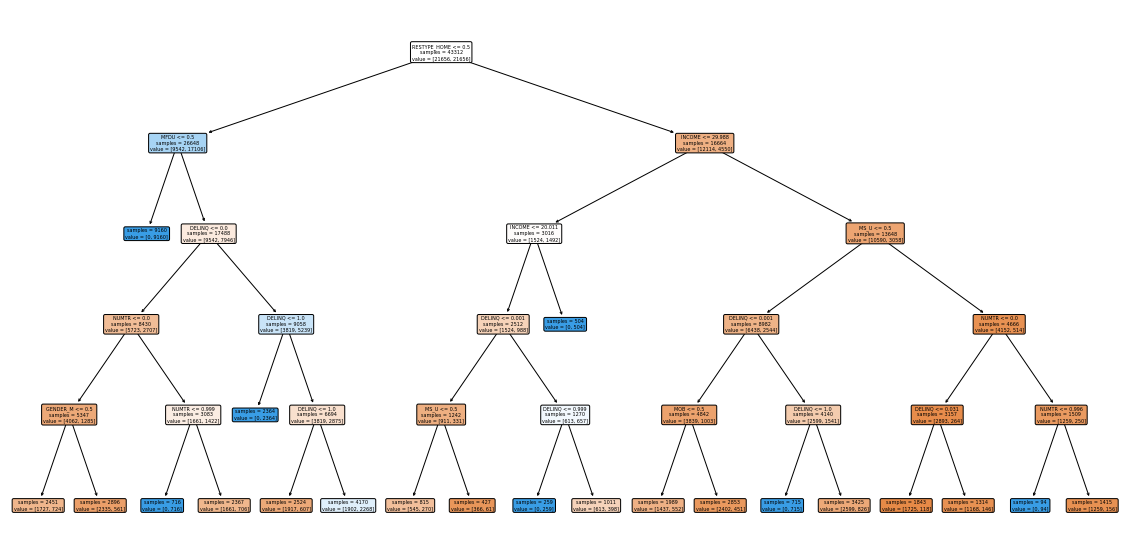

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = list(X_train.columns))

In [ ]:
print( export_text(DTree, feature_names = list(X_train_sm.columns)))

|--- RESTYPE_HOME <= 0.50
|   |--- MFDU <= 0.50
|   |   |--- class: 1
|   |--- MFDU >  0.50
|   |   |--- DELINQ <= 0.00
|   |   |   |--- NUMTR <= 0.00
|   |   |   |   |--- GENDER_M <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- GENDER_M >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- NUMTR >  0.00
|   |   |   |   |--- NUMTR <= 1.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- NUMTR >  1.00
|   |   |   |   |   |--- class: 0
|   |   |--- DELINQ >  0.00
|   |   |   |--- DELINQ <= 1.00
|   |   |   |   |--- class: 1
|   |   |   |--- DELINQ >  1.00
|   |   |   |   |--- DELINQ <= 1.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DELINQ >  1.00
|   |   |   |   |   |--- class: 1
|--- RESTYPE_HOME >  0.50
|   |--- INCOME <= 29.99
|   |   |--- INCOME <= 20.01
|   |   |   |--- DELINQ <= 0.00
|   |   |   |   |--- MS_U <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- MS_U >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- DELINQ > 

In [ ]:
# Train accuracy
predict1 = DTree.predict(X_train_sm)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y_train_sm, predict1)
print(cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[19754  1902]
 [ 5576 16080]]
0.8273457702253417


In [ ]:
# Test accuracy
predict1 = DTree.predict(X_test)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y_test, predict1)
print(cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[4911  480]
 [ 510   80]]
0.8344758401605082


Observe the Train and Test classification Report and write your observations:

`Write your observation in plain english here`

# 12) Solve class Imbalance with Balanced Sampling. (over sampling the minority class and undersampling the majority class)
Train a tree model till the Specificity(recall for class 1) is above 50%

In [ ]:
# Write your code here

Observe the final results and write your observations here:

`Write your observation in plain english here`

## Try Feature Engineering and see if the Accuracy for calss1(Recall for class1) improves.

In [ ]:
# Write your code here